In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import datetime as dt

# Grab All data files and pick only Vondelpark data

In [2]:
#WINDOWS
#files = glob.glob(r'Resono 2020-10\*\*\*.csv')
#MAC
files = glob.glob(r'Resono 2020-10/*/*/*.csv')
files[:5]

['Resono 2020-10/2020-10-18/10/2020-10-10T204729+0000_totalsper15minutes.csv',
 'Resono 2020-10/2020-10-18/10/2020-10-10T214736+0000_totalsper15minutes.csv',
 'Resono 2020-10/2020-10-18/10/2020-10-10T033222+0000_totalsper15minutes.csv',
 'Resono 2020-10/2020-10-18/10/2020-10-10T020222+0000_totalsper15minutes.csv',
 'Resono 2020-10/2020-10-18/10/2020-10-10T094726+0000_totalsper15minutes.csv']

In [3]:
resono_data = pd.concat( (pd.read_csv(file) for file in files), ignore_index = True)
resono_data.head(10)

,Location,Locationcode,Resono-ID,Start,End,Visits
0,Planciusbuurt Zuid,d872f67c-7de3-46b5-b937-664a37f115d2,rcd23000,2020-10-10T00:00:00+00:00,2020-10-10T00:14:59+00:00,91
1,Planciusbuurt Zuid,d872f67c-7de3-46b5-b937-664a37f115d2,rcd23000,2020-10-10T00:15:00+00:00,2020-10-10T00:29:59+00:00,75
2,Planciusbuurt Zuid,d872f67c-7de3-46b5-b937-664a37f115d2,rcd23000,2020-10-10T00:30:00+00:00,2020-10-10T00:44:59+00:00,64
3,Planciusbuurt Zuid,d872f67c-7de3-46b5-b937-664a37f115d2,rcd23000,2020-10-10T00:45:00+00:00,2020-10-10T00:59:59+00:00,50
4,Planciusbuurt Zuid,d872f67c-7de3-46b5-b937-664a37f115d2,rcd23000,2020-10-10T01:00:00+00:00,2020-10-10T01:14:59+00:00,16
5,Planciusbuurt Zuid,d872f67c-7de3-46b5-b937-664a37f115d2,rcd23000,2020-10-10T01:15:00+00:00,2020-10-10T01:29:59+00:00,16
6,Planciusbuurt Zuid,d872f67c-7de3-46b5-b937-664a37f115d2,rcd23000,2020-10-10T01:30:00+00:00,2020-10-10T01:44:59+00:00,15
7,Planciusbuurt Zuid,d872f67c-7de3-46b5-b937-664a37f115d2,rcd23000,2020-10-10T01:45:00+00:00,2020-10-10T01:59:59+00:00,15
8,Planciusbuurt Zuid,d872f67c-7de3-46b5-b937-664a37f115d2,rcd23000,2020-10-10T02:00:00+00:00,2020-10-10T02:14:59+00:00,9
9,Planciusbuurt Zuid,d872f67c-7de3-46b5-b937-664a37f115d2,rcd23000,2020-10-10T02:15:00+00:00,2020-10-10T02:29:59+00:00,9


In [4]:
# Missing value? Where is start 23:45?
df = resono_data.copy()
df.drop_duplicates(inplace=True)
df[df['Location'] == 'Oosterpark'].sort_values(by="Start")

,Location,Locationcode,Resono-ID,Start,End,Visits
6889,Oosterpark,f3b84e7c-a1c4-478c-9915-8c228e267bb5,rcd23083,2020-10-10T00:00:00+00:00,2020-10-10T00:14:59+00:00,145
284224,Oosterpark,f3b84e7c-a1c4-478c-9915-8c228e267bb5,rcd23083,2020-10-10T00:00:00+00:00,2020-10-10T00:14:59+00:00,128
6890,Oosterpark,f3b84e7c-a1c4-478c-9915-8c228e267bb5,rcd23083,2020-10-10T00:15:00+00:00,2020-10-10T00:29:59+00:00,122
284225,Oosterpark,f3b84e7c-a1c4-478c-9915-8c228e267bb5,rcd23083,2020-10-10T00:15:00+00:00,2020-10-10T00:29:59+00:00,104
6891,Oosterpark,f3b84e7c-a1c4-478c-9915-8c228e267bb5,rcd23083,2020-10-10T00:30:00+00:00,2020-10-10T00:44:59+00:00,120
...,...,...,...,...,...,...
359661,Oosterpark,f3b84e7c-a1c4-478c-9915-8c228e267bb5,rcd23083,2020-10-10T22:45:00+00:00,2020-10-10T22:59:59+00:00,176
567066,Oosterpark,f3b84e7c-a1c4-478c-9915-8c228e267bb5,rcd23083,2020-10-10T23:00:00+00:00,2020-10-10T23:14:59+00:00,206
359662,Oosterpark,f3b84e7c-a1c4-478c-9915-8c228e267bb5,rcd23083,2020-10-10T23:00:00+00:00,2020-10-10T23:14:59+00:00,238
359663,Oosterpark,f3b84e7c-a1c4-478c-9915-8c228e267bb5,rcd23083,2020-10-10T23:15:00+00:00,2020-10-10T23:29:59+00:00,200


In [10]:
# Some entries are duplicate, so we need to take the average
df_average_visits = df 
df_average_visits['Start'] = pd.to_datetime(df_average_visits['Start'])
df_average_visits = df_average_visits.groupby(['Location', 'Start']).mean().reset_index()
df_average_visits['End'] = df_average_visits['Start'] + dt.timedelta(minutes=14, seconds=59)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
def search_locations(search):
    # boolean series returned with False at place of NaN
    bool_series = df_average_visits["Location"].str.lower().str.contains(search)
    
    # return list of search result
    return df_average_visits[bool_series]['Location'].unique().tolist()

search_locations('park')

['Bijlmerpark West',
 'Erasmuspark',
 'Oosterpark',
 'Oosterparkbuurt',
 'Overhoeksparklaan',
 'Rembrandtpark Noord',
 'Rembrandtpark Zuid',
 'Sarphatipark',
 'Vondelpark Oost',
 'Vondelpark West',
 'Willemspark']

In [34]:
#Top 6 biggest parks
locations = ['Rembrandtpark Noord',
 'Rembrandtpark Zuid',
 'Sarphatipark',
 'Vondelpark Oost',
 'Vondelpark West',
 'Oosterpark',
 'Erasmuspark',
 'Westergasfabriek']

In [75]:
# Only select resono data of biggest 6 parks
df_average_visits_parks = df_average_visits[df_average_visits['Location'].isin(locations)]

# Merge Noord-Zuid & Oost-West into one location
df_average_visits_parks.loc[df_average_visits_parks.Location.str.contains('Rembrandtpark'), 'Location'] = 'Rembrandtpark'
df_average_visits_parks.loc[df_average_visits_parks.Location.str.contains('Vondelpark'), 'Location'] = 'Vondelpark'

df_average_visits_parks_summed = df_average_visits_parks.groupby(['Location', 'Start']).sum().reset_index()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:xlabel='Start', ylabel='Visits'>

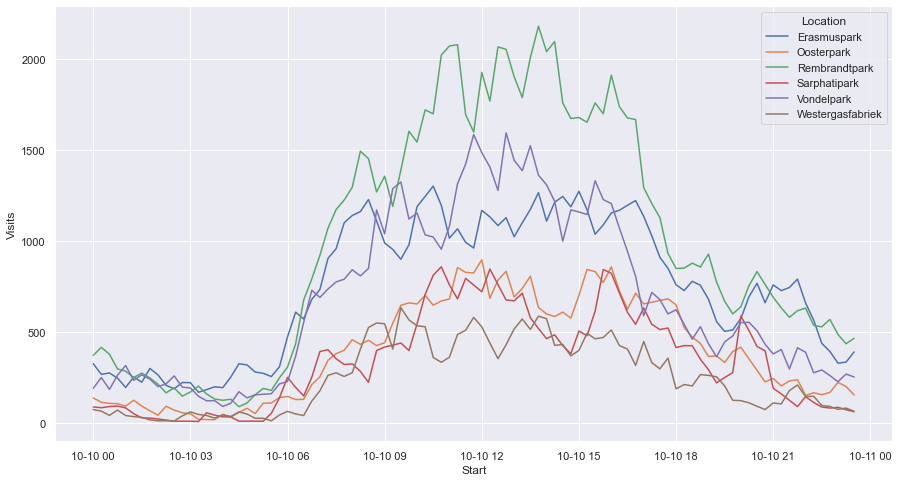

In [76]:
sns.lineplot(x="Start", y="Visits", hue="Location", data=df_average_visits_parks_summed)